In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

img_name = "./camera_cal/calibration2.jpg"
test_img = mpimg.imread(img_name)
plt.imshow(test_img)

In [2]:
images = glob.glob("./camera_cal/calibration*.jpg")

# array ti store object and images points
# top left (0,0,0), bottom right (7,5,0)

objpoints = [] # 3d points in real world
imgpoints = [] # 2D points in image plane

# prepare oiunts, like (0,0,0), (1,0,0), (2,0,0), ... (7,5,0)
n_x = 9
n_y = 6
objp = np.zeros((n_x*n_y,3), np.float32)
objp[:,:2] = np.mgrid[0:n_x, 0:n_y].T.reshape(-1, 2) # x, y coordinates

for img_name in images:
    # Load image
    img = mpimg.imread(img_name)
    
    # Convert to grayscale image
    grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # find chessboard corners
    ret, corners = cv2.findChessboardCorners(grayscale_image, (n_x, n_y), None)

    # if corners are found, add object points, image points
    if ret is True:
        print("appending points for image {}...".format(img_name))
        imgpoints.append(corners)
        objpoints.append(objp) # everytime the same, cause it the "real" chessboard

        # draw n display
        img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
        plt.imshow(img)
    else:
        print("there is an issue with image {}, right number of corners cannot be found".format(img_name))

there is an issue with image ./camera_cal\calibration1.jpg, right number of corners cannot be found
appending points for image ./camera_cal\calibration10.jpg...
appending points for image ./camera_cal\calibration11.jpg...
appending points for image ./camera_cal\calibration12.jpg...
appending points for image ./camera_cal\calibration13.jpg...
appending points for image ./camera_cal\calibration14.jpg...
appending points for image ./camera_cal\calibration15.jpg...
appending points for image ./camera_cal\calibration16.jpg...
appending points for image ./camera_cal\calibration17.jpg...
appending points for image ./camera_cal\calibration18.jpg...
appending points for image ./camera_cal\calibration19.jpg...
appending points for image ./camera_cal\calibration2.jpg...
appending points for image ./camera_cal\calibration20.jpg...
appending points for image ./camera_cal\calibration3.jpg...
there is an issue with image ./camera_cal\calibration4.jpg, right number of corners cannot be found
there is 

In [3]:
# objpoints is our original array of all real points and imgpoints now holds the result of all calibration images
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, test_img[:,:,2].shape[::-1], None, None)

In [4]:
# shorter
def ud(img, my_mtx = mtx, my_dist = dist):
    return cv2.undistort(img, mtx, dist, None, mtx)

test_img_udst = ud(test_img)

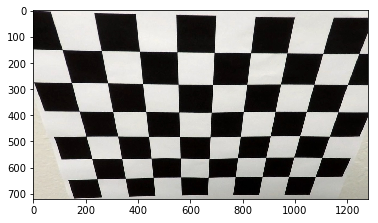

In [5]:
plt.imshow(test_img_udst)
plt.show()

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('test_images/test5.jpg')

# Edit this function to create your own pipeline.
def threshold(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    # Sobel x
    sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    return combined_binary






In [125]:
import numpy as np
import cv2

def warp(img, 
         src = [[203, 720], [595, 450], [685, 450], [1077, 720]], 
         dst = [[203, 720], [203, 0], [1077, 0], [1077, 720]],
         invert=False):
    

    img_size = (img.shape[1], img.shape[0])

    src = np.float32(src)

    dst = np.float32(dst)

    # compute the transformation
    M = cv2.getPerspectiveTransform(src, dst)

    # compute the inverse to reverse the transformation
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    #  ---> X
    #  | 1....2
    # \/ ......
    # y  0....3
    #target_dim_x = int(dst[2][0] - dst[0][0])
    #target_dim_y = int(dst[0][1] - dst[1][1])
    #warped = warped[0:target_dim_y, 0:target_dim_x] # Crop from x, y, w, h -> 100, 200, 300, 400

    if invert:
        # get warped image
        return cv2.warpPerspective(img, Minv, img_size, flags=cv2.INTER_LINEAR, # INTER_CUBIC
                                   borderMode=cv2.BORDER_CONSTANT, borderValue = [0, 0, 0, 0])
    else:
        return cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR, # INTER_CUBIC
                                   borderMode=cv2.BORDER_CONSTANT, borderValue = [0, 0, 0, 0])

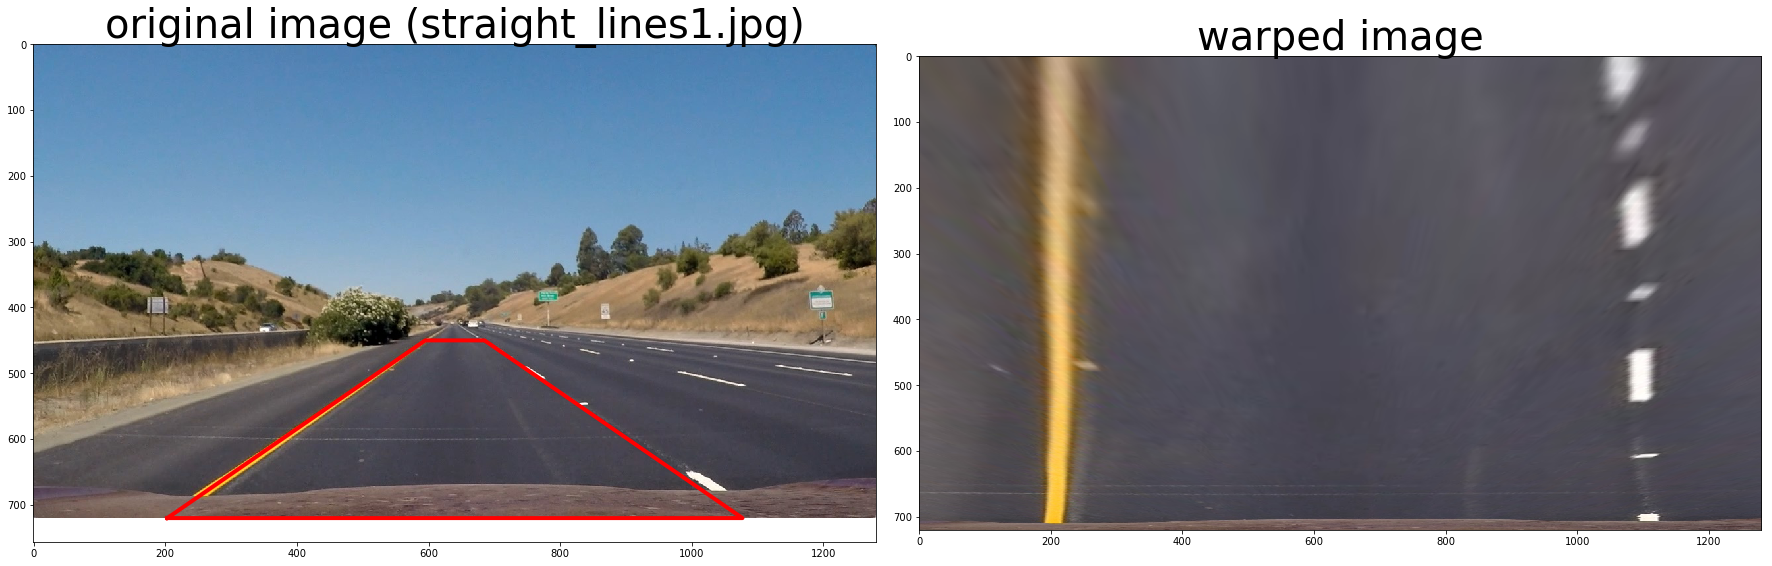

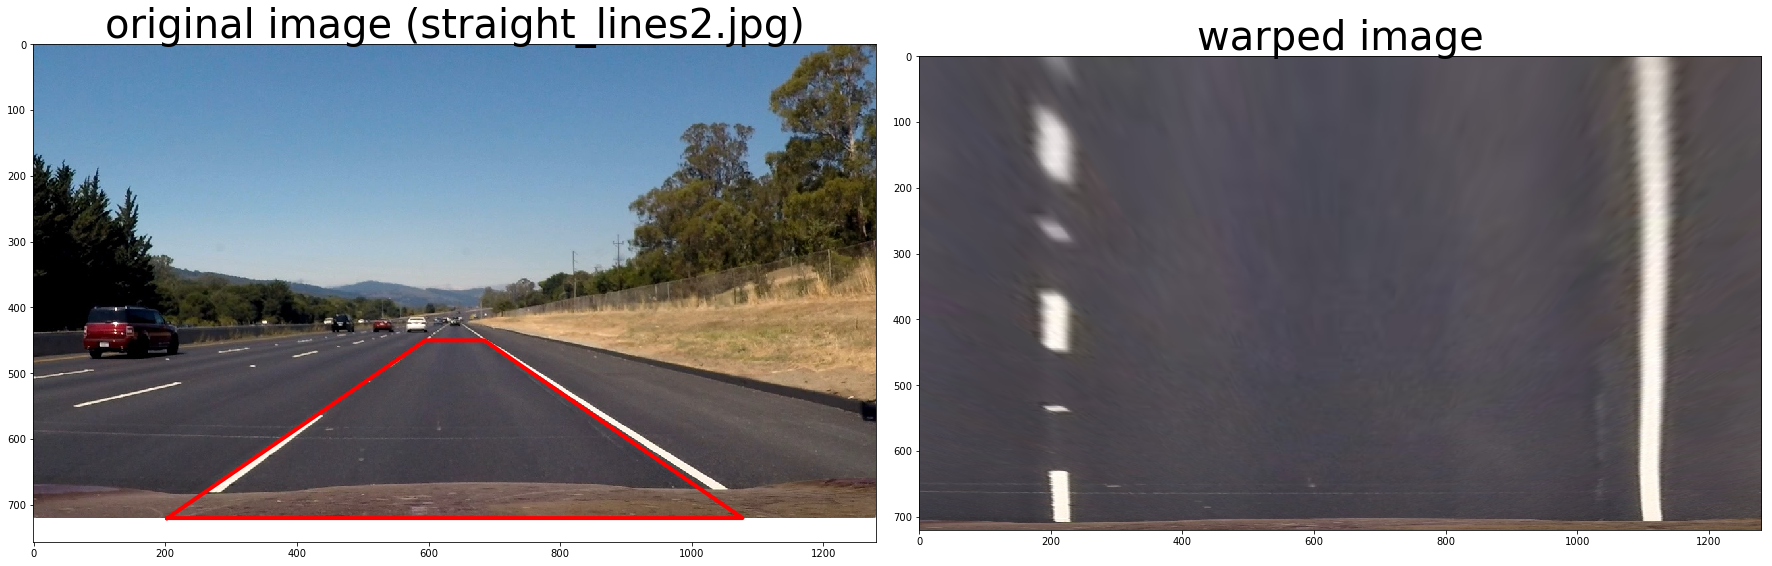

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


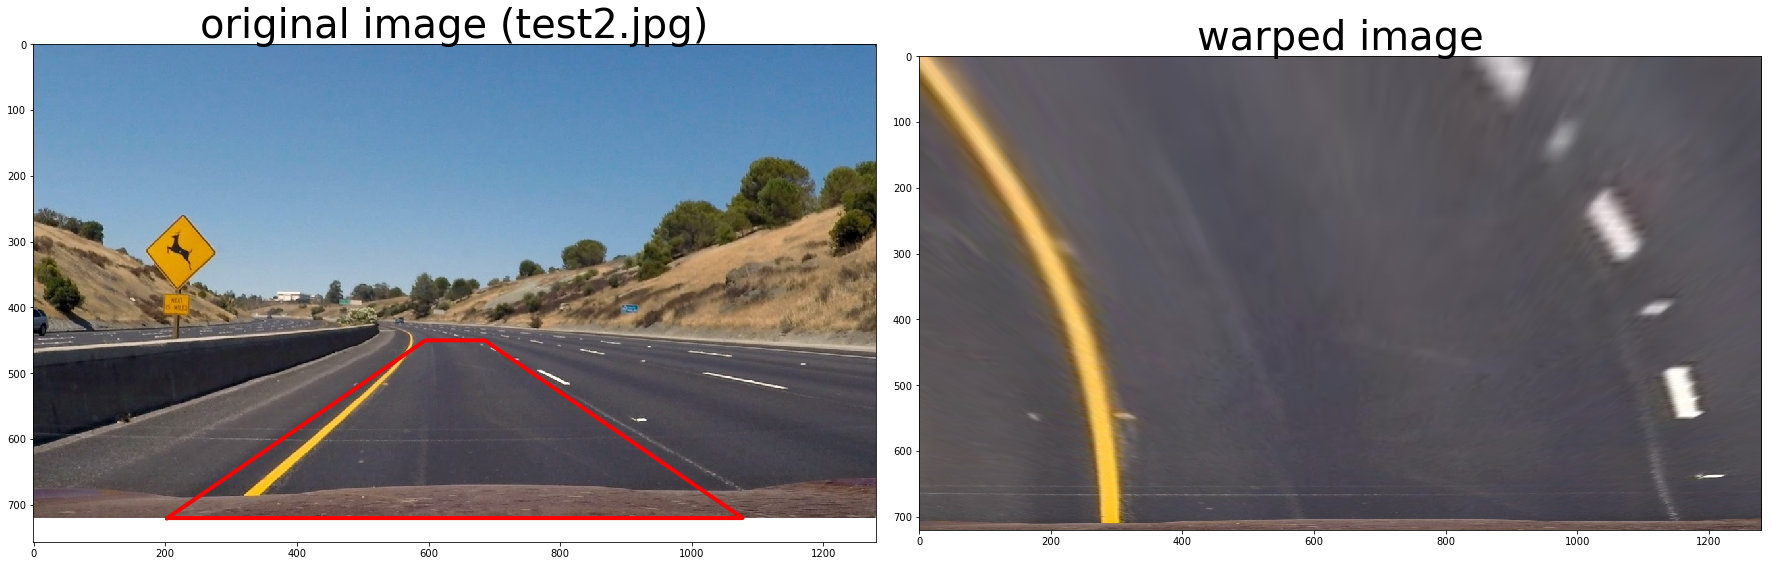

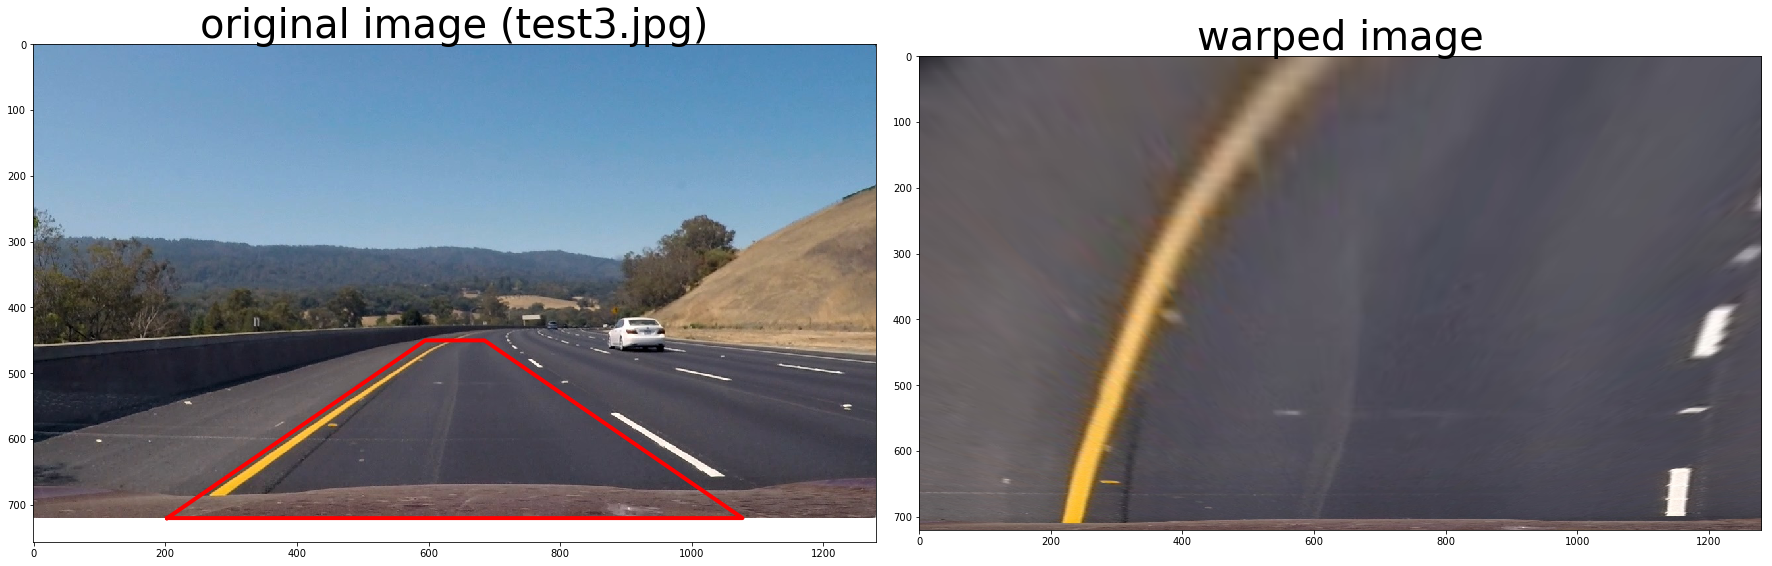

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


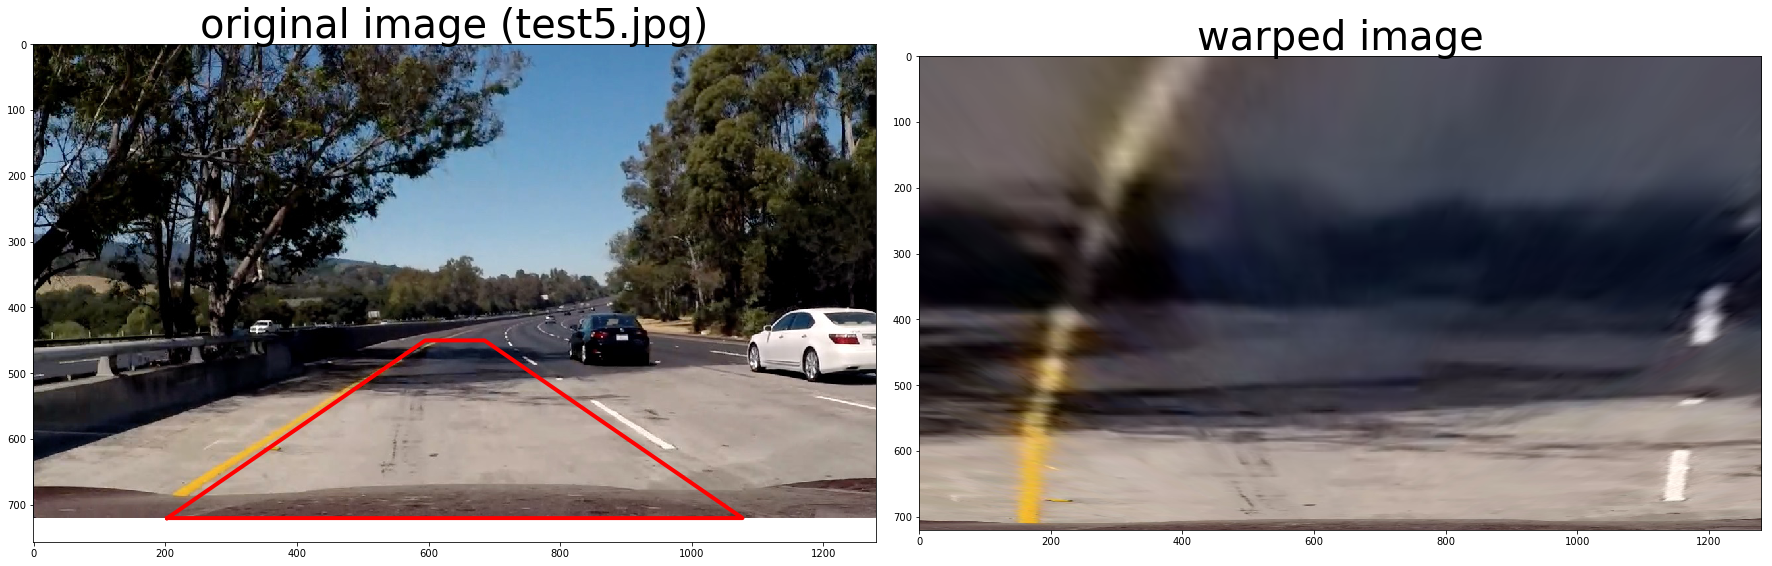

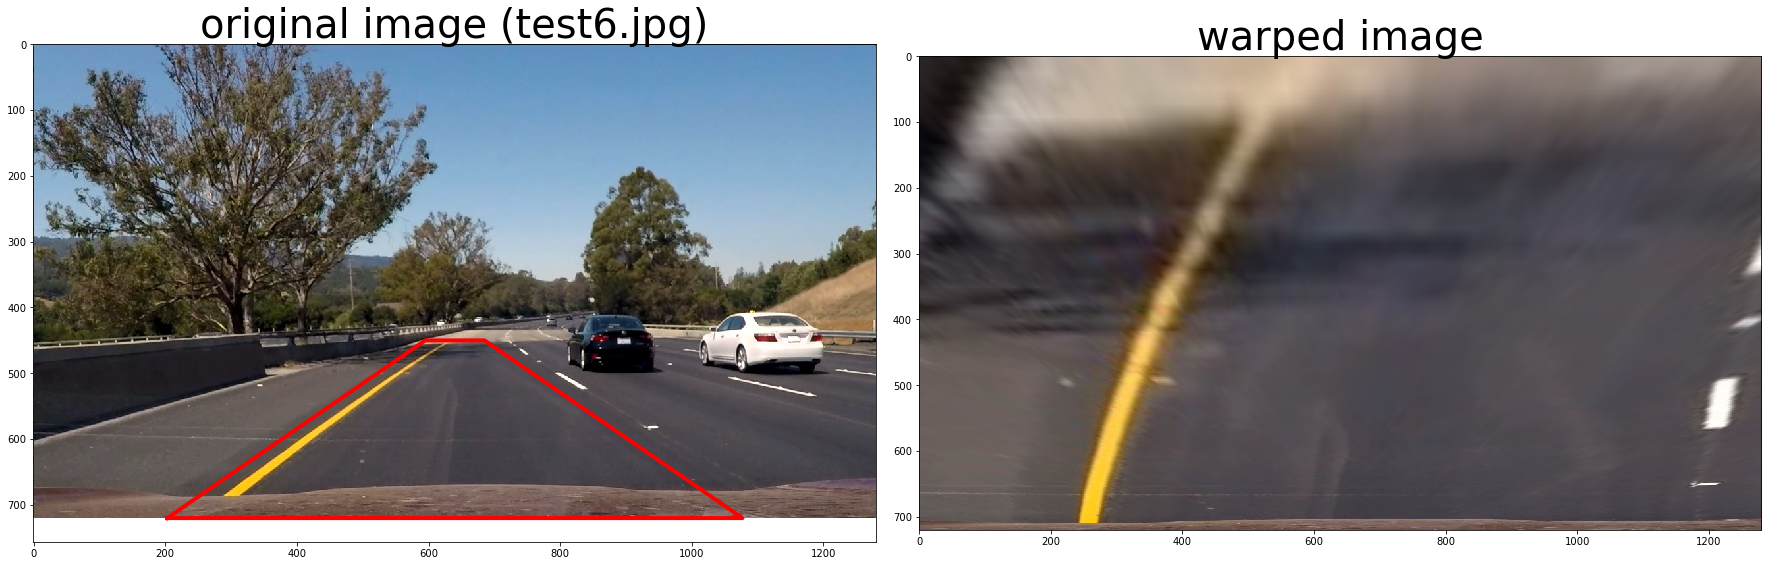

In [59]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os

# Read and dispaly the original image
img = mpimg.imread("test_images/straight_lines1.jpg")
im_height, im_width, im_depth = img.shape
distance_x_close = 203  # distance between border of image and polygon
distance_x_far = 595
px_y_close = im_height
px_y_far = 450

# source rectangle
x_plot = [distance_x_close, distance_x_far, im_width - distance_x_far, im_width - distance_x_close]
x_plot.append(x_plot[0])
y_plot = [px_y_close, px_y_far, px_y_far, px_y_close]
y_plot.append(y_plot[0])
src = []
for i, (x, y) in enumerate(zip(x_plot, y_plot)):
    if i > 3:
        # not used for warping, just for visualization
        break
    src.append([x, y])

dst_size_image = distance_x_far
x_dst = [distance_x_close, distance_x_close, im_width - distance_x_close, im_width - distance_x_close]
y_dst = [im_height, 0, 0,  im_height]
dst = []
for (x, y) in zip(x_dst, y_dst):
    dst.append([x, y])

images = glob.glob("test_images/*.jpg")
for pth in images:
    img = mpimg.imread(pth)
    f_name = os.path.basename(pth)
    result = warp(img, src=src, dst = dst)#, img_shape=[dst_size_image, dst_size_image])
    
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()

    ax1.imshow(img)
    ax1.set_title("original image ({})".format(f_name), fontsize=40)
    ax1.plot(x_plot, y_plot, linewidth=4, color="r")

    ax2.imshow(result, cmap='gray')
    ax2.set_title('warped image', fontsize=40)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

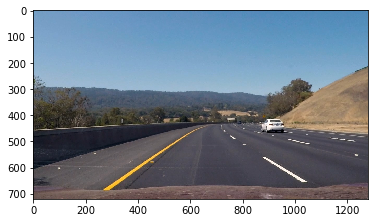

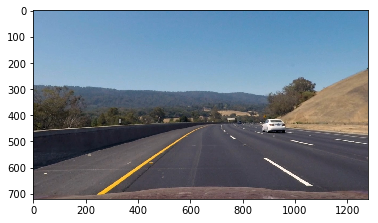

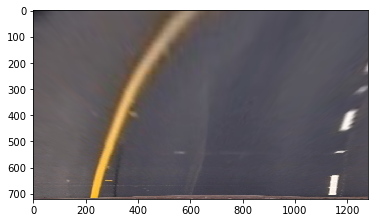

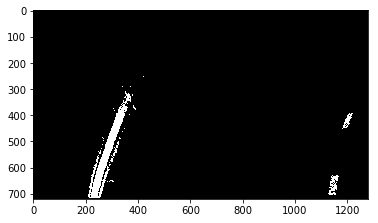

In [164]:
import numpy as np
img = mpimg.imread("test_images/test3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2RGBA)
plt.imshow(img)
plt.show()

undistorted = ud(img)
plt.imshow(undistorted)
plt.show()

warped = warp(undistorted)
plt.imshow(warped, cmap="gray")
plt.show()

warped_thresholded = threshold(warped)
plt.imshow(warped_thresholded, cmap="gray")
plt.show()

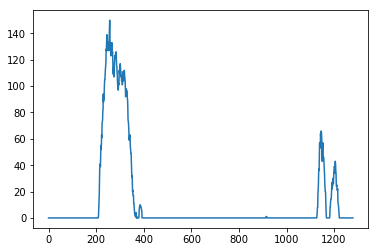

In [44]:
sections = 2
histogram = np.sum(warped_thresholded[warped_thresholded.shape[0]//sections:,:], axis=0)
plt.plot(histogram)
plt.show()

In [45]:
binary_warped = warped_thresholded

In [46]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assuming you have created a warped binary image called "binary_warped"
# Take a histogram of the bottom half of the image
histogram = np.sum(binary_warped[int(binary_warped.shape[0]/2):,:], axis=0)
# Create an output image to draw on and  visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high), (0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high), (0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

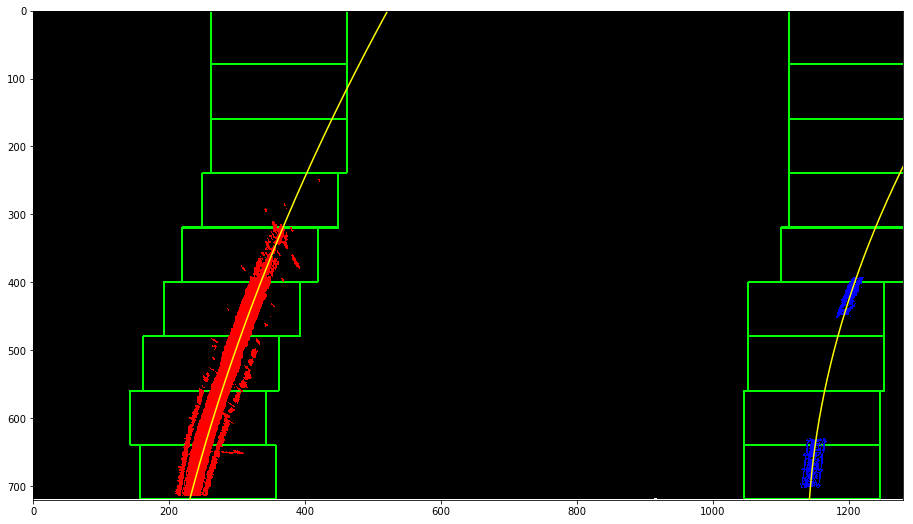

In [47]:
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.figure(figsize=(18, 9))
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.show()

In [48]:
def find_lane_without_sliding_window(binary_warped, last_left_fit, last_right_fit):
    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (last_left_fit[0]*(nonzeroy**2) + last_left_fit[1]*nonzeroy + 
    last_left_fit[2] - margin)) & (nonzerox < (last_left_fit[0]*(nonzeroy**2) + 
    last_left_fit[1]*nonzeroy + last_left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (last_right_fit[0]*(nonzeroy**2) + last_right_fit[1]*nonzeroy + 
    last_right_fit[2] - margin)) & (nonzerox < (last_right_fit[0]*(nonzeroy**2) + 
    last_right_fit[1]*nonzeroy + last_right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    last_left_fit = np.polyfit(lefty, leftx, 2)
    last_right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    last_left_fitx = last_left_fit[0]*ploty**2 + last_left_fit[1]*ploty + last_left_fit[2]
    last_right_fitx = last_right_fit[0]*ploty**2 + last_right_fit[1]*ploty + last_right_fit[2]
    
    return left_lane_inds, right_lane_inds, last_left_fitx, last_right_fitx
    
left_lane_inds, right_lane_inds, left_fitx, right_fitx= find_lane_without_sliding_window(binary_warped, 
                                                                                         last_left_fit=left_fit, 
                                                                                         last_right_fit=right_fit)

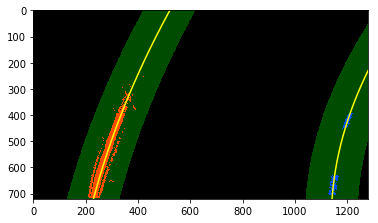

In [49]:
# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.show()

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2

# Read in a thresholded image
# window settings
window_width = 50 
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 80 # How much to slide left and right for searching, default was 100

def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

def find_window_centroids(warped, window_width, window_height, margin):
    
    window_centroids = [] # Store the (left,right) window centroid positions per level
    window = np.ones(window_width) # Create our window template that we will use for convolutions
    
    # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
    # and then np.convolve the vertical image slice with the window template 

    # just for reference: warped.shape yields [720,1280] => first dim is height (as always)

    # Sum quarter bottom of image to get slice, could use a different ratio
    l_sum = np.sum(warped[int(3*warped.shape[0]/4):,:int(warped.shape[1]/2)], axis=0)
    l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
    r_sum = np.sum(warped[int(3*warped.shape[0]/4):,int(warped.shape[1]/2):], axis=0)
    r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(warped.shape[1]/2)
    
    # Add what we found for the first layer
    window_centroids.append((l_center,r_center))
    
    # Go through each layer looking for max pixel locations
    l_last_delta = 0
    r_last_delta = 0
    n_vertical_slices = int(warped.shape[0]/window_height)
    for level in range(1,n_vertical_slices):
        # convolve the window into the vertical slice of the image
        slice_start = int(warped.shape[0]-(level+1)*window_height)
        slice_end = int(warped.shape[0]-level*window_height)
        print("slicing from {} to {}.".format(slice_start, slice_end))

        image_slice = warped[slice_start:slice_end,:]  # get image slice
        image_layer = np.sum(image_slice, axis=0)      # sum slice in y direction, to only get 1x1280 image

        # convole works like this np.convolve([1, 2, 3], [0, 1, 1]) -> array([0, 1, 3, 5, 3])
        conv_signal = np.convolve(window, image_layer)
        # Find the best left centroid by using past left center as a reference
        # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
        offset = window_width/2
        l_min_index = int(min(max(l_center+offset-margin,0), warped.shape[1]))
        l_max_index = int(max(min(l_center+offset+margin,warped.shape[1]), 0))
        if l_min_index == l_max_index:
            l_min_index = l_max_index - 1
        l_conv_signal = conv_signal[l_min_index:l_max_index]
        l_center_new = np.argmax(l_conv_signal)+l_min_index-offset
        # Find the best right centroid by using past right center as a reference
        r_min_index = int(min(max(r_center+offset-margin,0), warped.shape[1]))
        r_max_index = int(max(min(r_center+offset+margin,warped.shape[1]), 0))
        if r_min_index == r_max_index:
            r_min_index = r_max_index - 1
        r_conv_signal = conv_signal[r_min_index:r_max_index]
        r_center_new = np.argmax(r_conv_signal)+r_min_index-offset

        print("conv_left={}, conv_right={}, level={}".format(np.sum(l_conv_signal), np.sum(r_conv_signal), level))
        conv_threshold = 5000
        if (np.sum(l_conv_signal) < conv_threshold):
            # To less values to make a reliable statement
            l_center = l_center + l_last_delta
        else:
            l_last_delta = l_center_new - l_center
            l_center = l_center_new

        if (np.sum(r_conv_signal) < conv_threshold):
            # To less values to make a reliable
            r_center = r_center + r_last_delta
        else:
            r_last_delta = r_center_new - r_center
            r_center = r_center_new

        # Add what we found for that layer
        window_centroids.append((l_center,r_center))

    return window_centroids

window_centroids = find_window_centroids(binary_warped, window_width, window_height, margin)

# If we found any window centers
if len(window_centroids) > 0:

    # Points used to draw all the left and right windows
    l_points = np.zeros_like(binary_warped)
    r_points = np.zeros_like(binary_warped)

    # Go through each level and draw the windows
    for level in range(0,len(window_centroids)):
        # Window_mask is a function to draw window areas
        l_mask = window_mask(window_width,window_height,binary_warped,window_centroids[level][0],level)
        r_mask = window_mask(window_width,window_height,binary_warped,window_centroids[level][1],level)
        # Add graphic points from window mask here to total pixels found 
        l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
        r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

    # Draw the results
    template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
    zero_channel = np.zeros_like(template) # create a zero color channel
    template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
    warpage = np.array(cv2.merge((binary_warped,binary_warped,binary_warped)),np.uint8) # making the original road pixels 3 color channels
    output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results
    
# If no window centers found, just display orginal road image
else:
    log("no window center found...")
    output = np.array(cv2.merge((warped)),np.uint8)

slicing from 560 to 640.
conv_left=180300.0, conv_right=9950.0, level=1
slicing from 480 to 560.
conv_left=155264.0, conv_right=0.0, level=2
slicing from 400 to 480.
conv_left=130069.0, conv_right=36714.0, level=3
slicing from 320 to 400.
conv_left=92634.0, conv_right=4650.0, level=4
slicing from 240 to 320.
conv_left=5378.0, conv_right=0.0, level=5
slicing from 160 to 240.
conv_left=0.0, conv_right=0.0, level=6
slicing from 80 to 160.
conv_left=0.0, conv_right=0.0, level=7
slicing from 0 to 80.
conv_left=0.0, conv_right=0.0, level=8


[(254.0, 1142.0),
 (262.0, 1142.0),
 (290.0, 1142.0),
 (318.0, 1194.0),
 (349.0, 1246.0),
 (353.0, 1298.0),
 (357.0, 1350.0),
 (361.0, 1402.0),
 (365.0, 1454.0)]

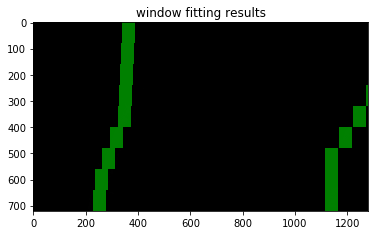

In [54]:
# Display the final results
plt.figure()
plt.imshow(output)
plt.title('window fitting results')
plt.show(block=False)

In [55]:
#leftx
lefty = lefty[::-1]
leftx = leftx[::-1]
#rightx
righty = righty[::-1]
rightx = rightx[::-1]

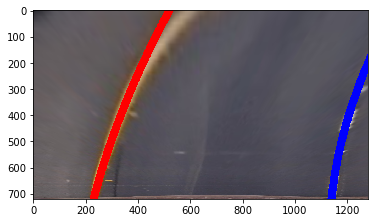

In [77]:
plt.imshow(warped)
plt.show()

In [200]:
b_channel

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 26, ..., 28,  0,  0]], dtype=uint8)

In [201]:
b_channel, g_channel, r_channel, a = cv2.split(bg_image_warped_back)
alpha_channel = np.array((b_channel < 255) * 255, dtype=np.uint8) #creating a dummy alpha channel image.
bg_image_warped_back = cv2.merge((b_channel, g_channel, r_channel, alpha_channel))


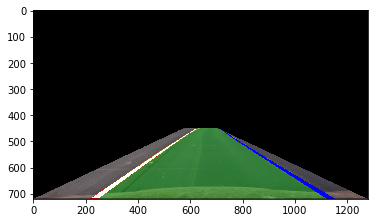

In [204]:
plt.imshow(bg_image_warped_back)
plt.show()

In [202]:
face_img = orig_image
overlay_t_img = bg_image_warped_back

# https://stackoverflow.com/questions/40895785/using-opencv-to-overlay-transparent-image-onto-another-image
# Split out the transparency mask from the colour info
overlay_img = overlay_t_img[:,:,:3] # Grab the BRG planes
overlay_mask = overlay_t_img[:,:,3:]  # And the alpha plane

# Again calculate the inverse mask
background_mask = 255 - overlay_mask

# Turn the masks into three channel, so we can use them as weights
overlay_mask = cv2.cvtColor(overlay_mask, cv2.COLOR_GRAY2BGR)
background_mask = cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR)

# Create a masked out face image, and masked out overlay
# We convert the images to floating point in range 0.0 - 1.0
face_part = (face_img * (1 / 255.0)) * (background_mask * (1 / 255.0))
overlay_part = (overlay_img * (1 / 255.0)) * (overlay_mask * (1 / 255.0))

# And finally just add them together, and rescale it back to an 8bit integer image    
out =  np.uint8(cv2.addWeighted(face_part, 255.0, overlay_part, 255.0, 0.0))

In [172]:
def blend_transparent(face_img, overlay_t_img):
    # https://stackoverflow.com/questions/40895785/using-opencv-to-overlay-transparent-image-onto-another-image
    # Split out the transparency mask from the colour info
    overlay_img = overlay_t_img[:,:,:3] # Grab the BRG planes
    overlay_mask = overlay_t_img[:,:,3:]  # And the alpha plane

    # Again calculate the inverse mask
    background_mask = 255 - overlay_mask

    # Turn the masks into three channel, so we can use them as weights
    overlay_mask = cv2.cvtColor(overlay_mask, cv2.COLOR_GRAY2BGR)
    background_mask = cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR)

    # Create a masked out face image, and masked out overlay
    # We convert the images to floating point in range 0.0 - 1.0
    face_part = (face_img * (1 / 255.0)) * (background_mask * (1 / 255.0))
    overlay_part = (overlay_img * (1 / 255.0)) * (overlay_mask * (1 / 255.0))

    # And finally just add them together, and rescale it back to an 8bit integer image    
    return np.uint8(cv2.addWeighted(face_part, 255.0, overlay_part, 255.0, 0.0))

def blend_non_transparent(face_img, overlay_img):
    # Let's find a mask covering all the non-black (foreground) pixels
    # NB: We need to do this on grayscale version of the image
    gray_overlay = cv2.cvtColor(overlay_img, cv2.COLOR_BGR2GRAY)
    overlay_mask = cv2.threshold(gray_overlay, 1, 255, cv2.THRESH_BINARY)[1]

    # Let's shrink and blur it a little to make the transitions smoother...
    overlay_mask = cv2.erode(overlay_mask, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
    overlay_mask = cv2.blur(overlay_mask, (3, 3))

    # And the inverse mask, that covers all the black (background) pixels
    background_mask = 255 - overlay_mask

    # Turn the masks into three channel, so we can use them as weights
    overlay_mask = cv2.cvtColor(overlay_mask, cv2.COLOR_GRAY2BGR)
    background_mask = cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR)

    # Create a masked out face image, and masked out overlay
    # We convert the images to floating point in range 0.0 - 1.0
    face_part = (face_img * (1 / 255.0)) * (background_mask * (1 / 255.0))
    overlay_part = (overlay_img * (1 / 255.0)) * (overlay_mask * (1 / 255.0))

    # And finally just add them together, and rescale it back to an 8bit integer image
    return np.uint8(cv2.addWeighted(face_part, 255.0, overlay_part, 255.0, 0.0))

In [251]:
def fit_lanes_on_image(leftx, lefty, rightx, righty, dx, right_r, left_r,
                       bg_image=None, use_weights = True, visualize = False):
    orig_image = img.copy()
    orig_image = cv2.cvtColor(orig_image, cv2.COLOR_RGBA2RGB)
    bg_image=warped.copy()
    use_weights = True

    right_lane = Line()
    left_lane = Line()

    # enhancement: trust close pixels more
    # the more distant (smaller y), the less weight
    # the closer to the edge (left: smaller x, right bigger x) the less weight
    base_trust = -0.5

    yvals = np.linspace(0, bg_image.shape[0]-1, bg_image.shape[0] )

    if use_weights:
        left_weights = lefty/np.max(lefty)+ leftx/np.max(leftx) + base_trust
        right_weights = righty/np.max(righty)+ (np.max(rightx)-rightx)/np.max(rightx) + base_trust
    else:
        left_weights = np.ones(len(lefty))
        right_weights = np.ones(len(righty))

    # Fit a second order polynomial to pixel positions in each fake lane line
    left_fit = np.polyfit(lefty, leftx, 2, w=left_weights)
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fit = np.polyfit(righty, rightx, 2, w=right_weights)
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # plot the data using cv2
    left_lane.current_fit = left_fitx
    right_lane.current_fit = right_fitx

    # Create an image to draw the lines on
    color_warp = np.zeros_like(bg_image).astype(np.uint8)

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, yvals]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, yvals])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    pts_l = np.transpose(np.vstack([left_lane.current_fit, yvals])).reshape((-1,1,2)).astype(np.int32)
    pts_r = np.transpose(np.vstack([right_lane.current_fit, yvals])).reshape((-1,1,2)).astype(np.int32)
    pts = np.vstack([pts_l, pts_r[::-1]])
    bg_image_copy = bg_image.copy()
    cv2.fillPoly(bg_image_copy, [pts], color=(0,255,0,255))
    alpha = 0.3
    cv2.addWeighted(bg_image_copy, alpha, bg_image, 1 - alpha, 0, bg_image)

    # Draw lane markers
    cv2.drawContours(bg_image, pts_l, -1, (255,0,0,255), thickness=30)
    cv2.drawContours(bg_image, pts_r, -1, (0,0,255,255), thickness=30)
    if visualize:
        plt.imshow(bg_image)
        plt.show()
    
    # warp back the image
    bg_image_warped_back = warp(bg_image, invert=True)
    if visualize:
        plt.imshow(bg_image_warped_back)
        plt.show()

    # merge the two images
    orig_image = blend_transparent(orig_image, bg_image_warped_back)
    if visualize:
        plt.imshow(orig_image)
        plt.show()

    # write text
    assembled_image = orig_image.copy()
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(assembled_image,"Left radius of curvature  = {0:.2f} m".format(left_r),(50,50), font, 1,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(assembled_image,"Right radius of curvature = {0:.2f} m".format(right_r),(50,80), font, 1,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(assembled_image,"Vehicle position : {0:.2f}m {1} of center".format(dx, ('left' if dx < 0 else 'right'))
                ,(50,110), font, 1,(255,255,255),2,cv2.LINE_AA)
    
    if visualize:
        plt.imshow(assembled_image)
        plt.show()
        
    return left_fit, right_fit, assembled_image

In [ ]:
def plot_to_ndarray(fig):
    fig.tight_layout(pad=0)
    
    # If we haven't already shown or saved the plot, then we need to
    # draw the figure first...
    fig.canvas.draw()

    # Now we can save it to a numpy array.
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

In [61]:
type(warped)

numpy.ndarray

In [57]:
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)

2841.69461964 1629.11803726


In [243]:
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print("{0:.0f}px, {1:.0f}px".format(left_curverad, right_curverad))

2842px, 1629px


844.1m, 383.5m


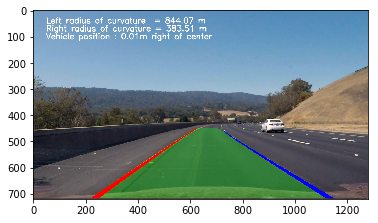

In [252]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_r_meters = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_r_meters = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print("{0:.1f}m, {1:.1f}m".format(left_r_meters, right_r_meters))
# Example values: 632.1 m    626.2 m
left_lane_center_px, right_lane_center_px = window_centroids[0]
deviation_from_middle_pixel = (right_lane_center_px-left_lane_center_px) / (bg_image.shape[1] / 2)
deviation_from_middle_meter = deviation_from_middle_pixel * xm_per_pix

left_fit, right_fit, assembled_image = fit_lanes_on_image(leftx, lefty, rightx, righty, 
                                                          dx=deviation_from_middle_meter, 
                                                          right_r=right_r_meters, left_r=left_r_meters,
                                                          bg_image=warped, use_weights = True)
plt.imshow(assembled_image)
plt.show()

In [ ]:
# warping back to image

In [ ]:
import numpy as np
img = mpimg.imread("test_images/test3.jpg")
plt.imshow(img)
plt.show()

undistorted = ud(img)
plt.imshow(undistorted)
plt.show()

warped = warp(undistorted)
plt.imshow(warped, cmap="gray")
plt.show()

warped_thresholded = threshold(warped)
plt.imshow(warped_thresholded, cmap="gray")
plt.show()

In [66]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None